In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
df = pd.read_csv(r"D:\Python_code-1\python_module\cust_satisfaction.csv")
df.head()

,Gender,Customer Type,Type of Travel,Class,satisfaction,Age,Flight Distance,Inflight entertainment,Baggage handling,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,Male,Loyal Customer,Personal Travel,Eco Plus,neutral or dissatisfied,13,460,5,4,5,25,18.0
1,Male,disloyal Customer,Business travel,Business,neutral or dissatisfied,25,235,1,3,1,1,6.0
2,Female,Loyal Customer,Business travel,Business,satisfied,26,1142,5,4,5,0,0.0
3,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied,25,562,2,3,2,11,9.0
4,Male,Loyal Customer,Business travel,Business,satisfied,61,214,3,4,3,0,0.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Gender                      103904 non-null  object 
 1   Customer Type               103904 non-null  object 
 2   Type of Travel              103904 non-null  object 
 3   Class                       103904 non-null  object 
 4   satisfaction                103904 non-null  object 
 5   Age                         103904 non-null  int64  
 6   Flight Distance             103904 non-null  int64  
 7   Inflight entertainment      103904 non-null  int64  
 8   Baggage handling            103904 non-null  int64  
 9   Cleanliness                 103904 non-null  int64  
 10  Departure Delay in Minutes  103904 non-null  int64  
 11  Arrival Delay in Minutes    103594 non-null  float64
dtypes: float64(1), int64(6), object(5)
memory usage: 9.5+ MB


In [4]:
df.isnull().sum()

Gender                          0
Customer Type                   0
Type of Travel                  0
Class                           0
satisfaction                    0
Age                             0
Flight Distance                 0
Inflight entertainment          0
Baggage handling                0
Cleanliness                     0
Departure Delay in Minutes      0
Arrival Delay in Minutes      310
dtype: int64

In [5]:
df.dropna(inplace=True)

In [6]:
df.duplicated().sum()

np.int64(172)

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
loyal_customer=df[df['Customer Type']=='Loyal Customer']
disloyal_customer=df[df['Customer Type']=='disloyal Customer']

In [9]:
loyal_customer=loyal_customer.sample(21000)
print(loyal_customer.shape)
print(disloyal_customer.shape)

(21000, 12)
(18905, 12)


In [10]:
balance_df = pd.concat([loyal_customer,disloyal_customer],axis=0)
balance_df

,Gender,Customer Type,Type of Travel,Class,satisfaction,Age,Flight Distance,Inflight entertainment,Baggage handling,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
14536,Male,Loyal Customer,Personal Travel,Eco Plus,neutral or dissatisfied,14,529,1,5,1,12,3.0
58134,Female,Loyal Customer,Business travel,Eco,satisfied,42,101,5,5,3,3,7.0
99226,Male,Loyal Customer,Business travel,Business,satisfied,43,1786,4,4,3,0,0.0
3870,Female,Loyal Customer,Business travel,Eco,neutral or dissatisfied,23,2288,2,4,2,0,0.0
879,Male,Loyal Customer,Business travel,Business,satisfied,52,3885,5,5,4,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
103892,Female,disloyal Customer,Business travel,Business,neutral or dissatisfied,37,596,3,3,3,110,121.0
103895,Female,disloyal Customer,Business travel,Eco,neutral or dissatisfied,24,1055,1,5,1,13,10.0
103899,Female,disloyal Customer,Business travel,Eco,neutral or dissatisfied,23,192,2,4,2,3,0.0
103901,Male,disloyal Customer,Business travel,Business,neutral or dissatisfied,30,1995,4,4,4,7,14.0


In [11]:
cat_col = balance_df.select_dtypes(include='object')
cat_col

,Gender,Customer Type,Type of Travel,Class,satisfaction
14536,Male,Loyal Customer,Personal Travel,Eco Plus,neutral or dissatisfied
58134,Female,Loyal Customer,Business travel,Eco,satisfied
99226,Male,Loyal Customer,Business travel,Business,satisfied
3870,Female,Loyal Customer,Business travel,Eco,neutral or dissatisfied
879,Male,Loyal Customer,Business travel,Business,satisfied
...,...,...,...,...,...
103892,Female,disloyal Customer,Business travel,Business,neutral or dissatisfied
103895,Female,disloyal Customer,Business travel,Eco,neutral or dissatisfied
103899,Female,disloyal Customer,Business travel,Eco,neutral or dissatisfied
103901,Male,disloyal Customer,Business travel,Business,neutral or dissatisfied


In [12]:
num_col = balance_df.select_dtypes(exclude='object')
num_col

,Age,Flight Distance,Inflight entertainment,Baggage handling,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
14536,14,529,1,5,1,12,3.0
58134,42,101,5,5,3,3,7.0
99226,43,1786,4,4,3,0,0.0
3870,23,2288,2,4,2,0,0.0
879,52,3885,5,5,4,0,0.0
...,...,...,...,...,...,...,...
103892,37,596,3,3,3,110,121.0
103895,24,1055,1,5,1,13,10.0
103899,23,192,2,4,2,3,0.0
103901,30,1995,4,4,4,7,14.0


In [13]:
#one hot encoding using sklearn
from sklearn.preprocessing import OneHotEncoder
oh = OneHotEncoder(drop='if_binary')

cat_col_encoded = oh.fit_transform(cat_col).toarray()

cat_col_encoded 



array([[1., 0., 1., ..., 0., 1., 0.],
       [0., 0., 0., ..., 1., 0., 1.],
       [1., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 1., 0., ..., 1., 0., 0.],
       [1., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 1., 0., 0.]])

In [14]:
column_name = list(oh.get_feature_names_out())
column_name

['Gender_Male',
 'Customer Type_disloyal Customer',
 'Type of Travel_Personal Travel',
 'Class_Business',
 'Class_Eco',
 'Class_Eco Plus',
 'satisfaction_satisfied']

In [15]:
one_hot = pd.DataFrame(cat_col_encoded,columns=column_name)
one_hot

,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus,satisfaction_satisfied
0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,1.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...
39900,0.0,1.0,0.0,1.0,0.0,0.0,0.0
39901,0.0,1.0,0.0,0.0,1.0,0.0,0.0
39902,0.0,1.0,0.0,0.0,1.0,0.0,0.0
39903,1.0,1.0,0.0,1.0,0.0,0.0,0.0


In [16]:
one_hot = one_hot.reset_index(drop=True)
num_col = num_col.reset_index(drop=True)
# final_df = pd.concat([one_hot, num_col], axis=1)
# print(final_df)


In [17]:
final_df = pd.concat([one_hot,num_col],axis=1)
final_df

,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus,satisfaction_satisfied,Age,Flight Distance,Inflight entertainment,Baggage handling,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,14,529,1,5,1,12,3.0
1,0.0,0.0,0.0,0.0,1.0,0.0,1.0,42,101,5,5,3,3,7.0
2,1.0,0.0,0.0,1.0,0.0,0.0,1.0,43,1786,4,4,3,0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,23,2288,2,4,2,0,0.0
4,1.0,0.0,0.0,1.0,0.0,0.0,1.0,52,3885,5,5,4,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39900,0.0,1.0,0.0,1.0,0.0,0.0,0.0,37,596,3,3,3,110,121.0
39901,0.0,1.0,0.0,0.0,1.0,0.0,0.0,24,1055,1,5,1,13,10.0
39902,0.0,1.0,0.0,0.0,1.0,0.0,0.0,23,192,2,4,2,3,0.0
39903,1.0,1.0,0.0,1.0,0.0,0.0,0.0,30,1995,4,4,4,7,14.0


In [18]:
final_df.to_csv('final_df.csv',index=False)



In [19]:
x = final_df.drop('Customer Type_disloyal Customer',axis=1)
y = final_df[['Customer Type_disloyal Customer']]

In [20]:
##splitting the data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(31924, 13)
(7981, 13)
(31924, 1)
(7981, 1)


In [21]:
#for warning
import warnings
warnings.filterwarnings('ignore')   


In [22]:

##model building
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(x_train,y_train)



LogisticRegression()

In [23]:
log.score(x_train,y_train)

0.862047362485904

In [24]:
log.score(x_test,y_test)

0.8582884350332038

In [25]:
pred = log.predict(x_test)
y_test["predictions"] = pred 
y_test

,Customer Type_disloyal Customer,predictions
21485,1.0,1.0
37296,1.0,1.0
5288,0.0,0.0
13852,0.0,0.0
19949,0.0,0.0
...,...,...
16801,0.0,0.0
23455,1.0,0.0
18114,0.0,0.0
25405,1.0,1.0


In [26]:
##confusion matrix
from sklearn.metrics import confusion_matrix,classification_report
confusion_matrix(y_test["Customer Type_disloyal Customer"],y_test["predictions"])

array([[3641,  576],
       [ 555, 3209]])

<Axes: >

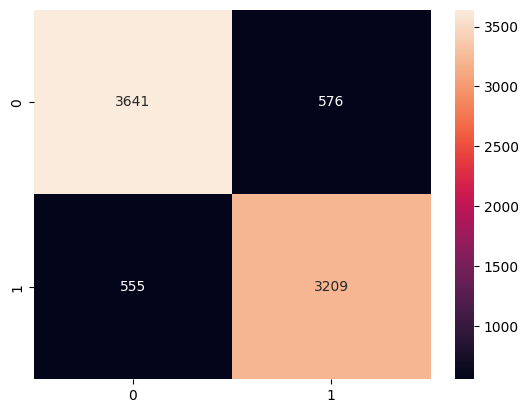

In [27]:
##heatmap
sns.heatmap(confusion_matrix(y_test["Customer Type_disloyal Customer"],y_test["predictions"]),annot=True,fmt='d')

In [28]:
##classification report
print(classification_report(y_test["Customer Type_disloyal Customer"],y_test["predictions"]))

              precision    recall  f1-score   support

         0.0       0.87      0.86      0.87      4217
         1.0       0.85      0.85      0.85      3764

    accuracy                           0.86      7981
   macro avg       0.86      0.86      0.86      7981
weighted avg       0.86      0.86      0.86      7981



<Axes: xlabel='Customer Type_disloyal Customer', ylabel='predictions'>

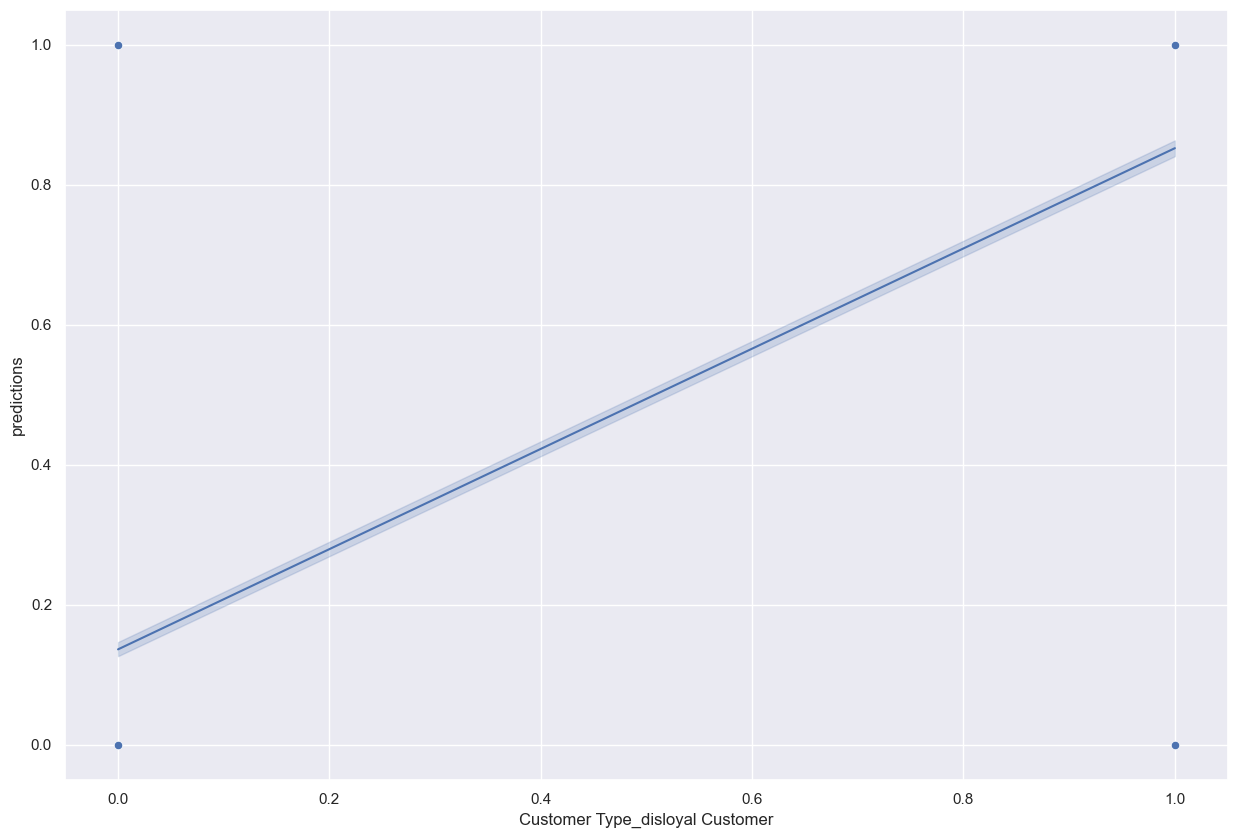

In [ ]:
##graph plot
sns.set(rc={'figure.figsize':(15,10)})
sns.lineplot(x=y_test["Customer Type_disloyal Customer"],y=y_test["predictions"])
## plot the points also
sns.scatterplot(x=y_test["Customer Type_disloyal Customer"],y=y_test["predictions"])
